In [1]:
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
%matplotlib inline

# Загружаем датасет

In [2]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

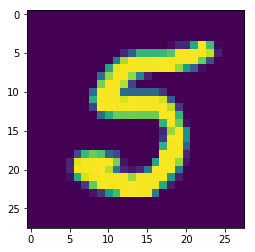

In [3]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][7777].reshape(28,28))

# Обучаем модель

In [4]:
def sigmoid (z):
    return 1 / (1 + np.exp (-z))

# LogLoss функция
def L (X, y, w, C):
    result = 0
    
    for i in range (X.shape[0]):
        A = y[i] * np.dot (X[i], w)
        result += (np.log (1 + np.exp (-A)))
        
    return (1 / X.shape[0]) * result + (1 / C) * np.dot(w.T, w)

In [5]:
# Вычисляем градиент LogLoss функции
def get_grad(xi, yi, w, C):    
    grad = (-C) * (sigmoid (yi * np.dot (xi, w))) * yi * xi * np.exp (-(yi * np.dot (xi, w))) + 2 * w
        
    return grad

In [6]:
# Поиск лучшего w
def optimize (X, y, w, max_iter, C, learning_rate):
    for i in range (max_iter):
        k = np.random.randint (X.shape[0])
        w -= get_grad (X[k], y[k], w, C) * learning_rate

In [7]:
# Присваиваем каждому классу 1 или -1
train['labels'][train['labels'] == 5] = -1
train['labels'][train['labels'] == 6] = 1

In [8]:
# Добавляем единичную колонку для w0
train['data'] = np.hstack([ np.ones((train['data'].shape[0], 1)), train['data']] )

In [9]:
# Инициализируем веса случайны образом
np.random.seed(11)
w = np.random.normal(scale=0.00001, size = train['data'].shape[1])

In [10]:
# Делим выборку на обучающую и тестовую
X_train, X_holdout, y_train, y_holdout = train_test_split(train['data'], train['labels'], test_size=0.15,
random_state=17)

In [11]:
# loss and accuracy info for each epoch
tr = []
te = []

# Regularization parameter
C = 0.01

# Number of epoches
max_epoch = 2000;

# The best solution
w_best = w
y_test_best = 0

for i in range (max_epoch):
    optimize (X_train, y_train, w, max_iter = 110, C = C, learning_rate = 0.00002)
    
    # Predictions in this epoch
    y_train_pred  = np.dot (X_train, w)
    y_test_pred   = np.dot (X_holdout, w)
    
    # Number of right predictions in this epoch
    y_train_right = 0
    y_test_right  = 0
    
    # Accuracy for train_set
    for j in range (y_train.shape[0]):
        if (sigmoid (y_train_pred [j]) >= 0.5 and y_train [j] == 1\
            or sigmoid (y_train_pred [j]) < 0.5 and y_train [j] == -1):
            
            y_train_right += 1
    
    # Accuracy for holdout_set
    for j in range (y_holdout.shape[0]):
        if (sigmoid (y_test_pred [j]) >= 0.5 and y_holdout [j] == 1\
            or sigmoid (y_test_pred [j]) < 0.5 and y_holdout [j] == -1):
            
            y_test_right += 1
    
    # Choose the best solution
    if (y_test_right > y_test_best):
        w_best = w
        y_test_best = y_test_right
    
    tr.append ({'loss': L (X_train, y_train, w, C = C),
                'accuracy': y_train_right / y_train.shape [0]})
    
    te.append ({'loss': L (X_holdout, y_holdout, w, C = C),
                'accuracy': y_test_right / y_holdout.shape [0]})

# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

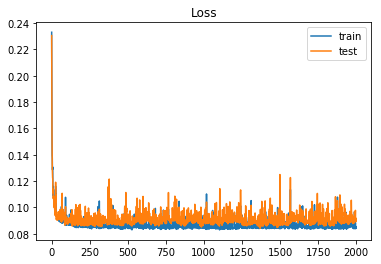

In [12]:
plt.title('Loss')
plt.plot([e['loss'] for e in tr], label='train')
plt.plot([e['loss'] for e in te], label='test')
plt.legend()

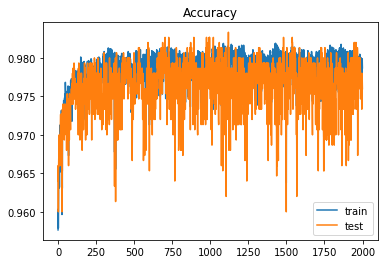

In [13]:
plt.title('Accuracy')
plt.plot([e['accuracy'] for e in tr], label='train')
plt.plot([e['accuracy'] for e in te], label='test')
plt.legend()

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [14]:
X = test_no_lables['data']
X = np.hstack([ np.ones((X.shape[0], 1)), X])

Y_pred = np.dot (X, w_best)

with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(len(test_no_lables['data'])):
        print(i, sigmoid (Y_pred[i]), sep=',', file=fout)

# Сдача

1. Регистрируетесь на конкурс https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528 
1. Преодолеваете "Pass level" baseline
1. После того, как вы преодолеете baseline, присылайте ноутбук с решение по адресу **voropaev@corp.mail.ru**

# Внимание
- Пишите тему письм в формате "[МИФИ][1] Фамилия"
- Внутри писма прикрепляете файл ноутбука с именем family.ipynb
- Обязательно указывайте ваш ник на kaggle